# Nettoyage pour Machine Learning : Titanic

In [52]:
#je fais mes import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltF
import seaborn as sns
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Chargement des jeux de données et préparation des train/test

Dans cet exercice, deux jeux de données doivent être nettoyés. Un echantillon train celui qui entrainera le modele, ce dataset est donc labellisé (avec résultat). Un echantillon test (sans resultat/label) dont l objectif est de prédire les labels de chacunes de ses lignes

In [59]:
train = read_csv('train.csv', header=0)
test = read_csv('test.csv', header=0)

In [60]:
#regarder le train
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.75,NaN,Q
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.10,C123,S
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.50,B73,S


In [8]:
#regarder le test
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
251,1143,3,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,SOTON/O2 3101284,7.9250,NaN,S
132,1024,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,S
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C


Survived est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

# Analyse du dataset

Analyser les datasets avec par ex .describe(include="all")

In [9]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Turja, Miss. Anna Sofia",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Premieres remarques sur note jeu de données:

- 891 passagers
- 20% des informations sur leurs ages est manquantes 
- 75% des information cabines sont manquantes

Quel impact du sex sur la chance de survie ?

Percentage de femme ayant survécu: 74.20382165605095
Percentage d' homme ayant survécu: 18.890814558058924


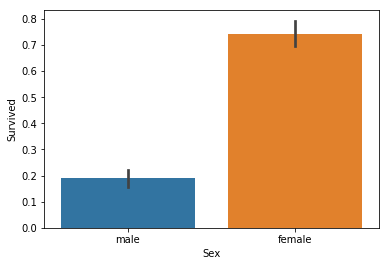

In [10]:

#Dessin d'un bar plot des survivants selon leurs sexe
sns.barplot(x="Sex", y="Survived", data=train)

print("Percentage de femme ayant survécu:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage d' homme ayant survécu:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Quel impact de la classe sur la chance de survie ?

Tracer une petite dataViz avec seaborn

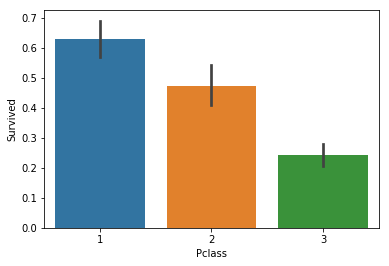

In [11]:
sns.barplot(x="Pclass", y="Survived", data=train)

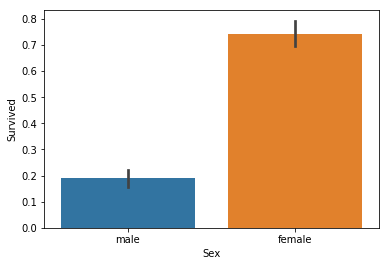

In [12]:
sns.barplot(x="Sex", y="Survived", data=train)

Quel impact de l'age sur la chance de survie ?

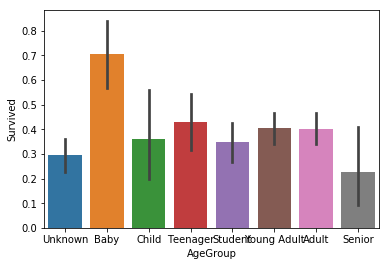

In [13]:
#classer les ages dans catégories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

# Nettoyage du dataset

Combien de valeurs nulles ?

In [14]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
dtype: int64

In [15]:
#nombre de ligne eet de collones
train.shape

(891, 13)

Notre échantillon d'entrainement est petit, eliminer les Nan et donc la ligne entière reduirait encore plus la taille de notre jeu d'entrainement

Comment conserver l'information de la ligne (observation) malgré ces Nan

In [16]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S,Young Adult
324,325,0,3,"Sage, Mr. George John Jr",male,-0.5,8,2,CA. 2343,69.5500,NaN,S,Unknown
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S,Student
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
128,129,1,3,"Peter, Miss. Anna",female,-0.5,1,1,2668,22.3583,F E69,C,Unknown


Nous pouvons remplacer ces Nan par une valeur defaut ? Ou essayer de le remplacer par une valeur proche de son profil (qualifier par les autre variables)

Comment gérer le nom des personne devons nous tout jeter ou peut etre conserver des informations comme son titre (Mr / Miss / Lord / ... ). Ces informations ont certainement une corrélation avec le target que nous souhaitons prédire (A t il survi ?)

## Colonne cabin

In [17]:
# Eliminons cette colonne. En effet, trop de valeurs sont absentes (> 650)
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

## Colonne ticket 

Eliminons egalement la colonne ticket. En effet quasiment chaque ligne est différente (680)

In [18]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

## Colonne embarked

In [19]:
print("Nombre de passager ayant embarqué à Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Nombre de passager ayant embarqué à Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Nombre de passager ayant embarqué à Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Nombre de passager ayant embarqué à Southampton (S):
644
Nombre de passager ayant embarqué à Cherbourg (C):
168
Nombre de passager ayant embarqué à Queenstown (Q):
77


Nous remplaçons les valeurs manquantes par S qui represente la majorité des valeurs de cette colonne

In [20]:
#remplacer les fillnas par des S
train["Embarked"] = train["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].fillna("S")

In [21]:
#je tcheck
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult


## Colonne age

Beaucoup de valeurs sont manquanes nous ne pouvons pas les compléter par une valeur unique. Nous allons essayer de trouver un moyen de réduire le risque lié au remplissage de ces cellules.

In [23]:
#On crée un group de dataset (train et test) pour nettoyer deux dataframes avec les memes opérations
combine = [train, test]

#Extraction des titres dans la colonne nom puis test
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
#Remplacement de certains titres peu fréquents par un label commun
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


mapper chaque titre avec une valeur numérique. C'est à dire, par exemple, remplacer Miss par 1, ...

In [25]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Royal'], dtype=object)

In [26]:
for dataset in combine:
    
    dataset['Title'] = dataset['Title'].replace('Mr',1)
    dataset['Title'] = dataset['Title'].replace('Mrs',2)
    dataset['Title'] = dataset['Title'].replace('Miss',3)
    dataset['Title'] = dataset['Title'].replace('Master',4)
    dataset['Title'] = dataset['Title'].replace('Rare',5)
    dataset['Title'] = dataset['Title'].replace('Royal',6)
                                                 
                                                 

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


Mainenant, nous allons essayer d'estimer l'ages des passagers à partir de leurs titres.

In [28]:
# Pour chaque titre prendre l'age le plus commun des passagers
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Teenager", 6: "Child", 7: "Senior"}



for x in train["AgeGroup"].index:
    if train["AgeGroup"].loc[x] == "Unknown":
        train["AgeGroup"].loc[x] = age_title_mapping[train["Title"].loc[x]]
        
for x in test["AgeGroup"].index:
    if test["AgeGroup"].loc[x] == "Unknown":
        test["AgeGroup"].loc[x] = age_title_mapping[test["Title"].loc[x]]

In [29]:
train["AgeGroup"].unique()

[Student, Adult, Young Adult, Baby, Teenager, Child, Senior]
Categories (7, object): [Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [30]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,2


Mapping de chaque group d'age

In [31]:
##Mappind de chaque groupe
train["AgeGroup"] = train["AgeGroup"].replace('Student',1)
train["AgeGroup"] = train["AgeGroup"].replace('Adult',2)
train["AgeGroup"] = train["AgeGroup"].replace('Young Adult',3)
train["AgeGroup"] = train["AgeGroup"].replace('Baby',4)
train["AgeGroup"] = train["AgeGroup"].replace('Teenager',5)
train["AgeGroup"] = train["AgeGroup"].replace('Child',6)
train["AgeGroup"] = train["AgeGroup"].replace('Senior',7)





In [32]:
# Nous pouvons effacer la colonne age ainsi que la colonne name une fois les informations sur le titre extrait
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [33]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
414,415,1,3,male,0,0,7.9250,S,2,1
170,171,0,1,male,0,0,33.5000,S,7,1
836,837,0,3,male,0,0,8.6625,S,1,1
231,232,0,3,male,0,0,7.7750,S,3,1
56,57,1,2,female,0,0,10.5000,S,1,3


## Colonne sex

Mapper les valeurs de la colonne sex

In [34]:
train['Sex'] = train['Sex'].replace('male',1)
train['Sex'] = train['Sex'].replace('female',2)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,1,1,0,7.2500,S,1,1
1,2,1,1,2,1,0,71.2833,C,2,2
2,3,1,3,2,0,0,7.9250,S,3,3
3,4,1,1,2,1,0,53.1000,S,3,2
4,5,0,3,1,0,0,8.0500,S,3,1


## Embarked colonne

In [36]:
#mapper les valeurs de la colonne embarked
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,1,1,0,7.2500,1,1,1
1,2,1,1,2,1,0,71.2833,2,2,2
2,3,1,3,2,0,0,7.9250,1,3,3
3,4,1,1,2,1,0,53.1000,1,3,2
4,5,0,3,1,0,0,8.0500,1,3,1


In [37]:
train["Fare"].isnull().unique()

array([False])

## Colonne Fare

In [38]:
#Documentation des valeurs manquantes de l'echantillon test
for x in test["Fare"].index:
    if pd.isnull(test["Fare"].loc[x]):
        pclass = test["Pclass"].loc[x] #Pclass = 3
        test["Fare"].loc[x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#Mapper les labels fare en valeurs numeriques
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#Elimination des colonnes
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

/home/funnyeoman/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Check des echantillons Test et Train

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,1,1,0,1,1,1,1
1,2,1,1,2,1,0,2,2,2,4
2,3,1,3,2,0,0,1,3,3,2
3,4,1,1,2,1,0,1,3,2,4
4,5,0,3,1,0,0,1,3,1,2


In [40]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,892,3,male,0,0,3,Young Adult,1,1
1,893,3,female,1,0,1,Adult,2,1
2,894,2,male,0,0,3,Senior,1,2
3,895,3,male,0,0,1,Young Adult,1,2
4,896,3,female,1,1,1,Student,2,2


# Décomposition de l'echantillon train en sous train et sous test

Survived est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

Nous l'appellerons target et nous conserverons egalement l'ID passenger associé

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       891 non-null int64
AgeGroup       891 non-null int64
Title          891 non-null int64
FareBand       891 non-null category
dtypes: category(1), int64(9)
memory usage: 63.8 KB


In [42]:
train['FareBand']=train['FareBand'].astype(int)

In [43]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]

In [44]:
# Nous gardons 20 %  de notre echantillon train qui est labelisé pour evaluer la performance de notre modele 
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

# Modélisation / Prédiction

In [45]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.41


In [46]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.86


/home/funnyeoman/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

80.72


/home/funnyeoman/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score
import math

#model = CatBoostClassifier()
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

model.fit(x_train, y_train)
print("debut du predict")
y_pred = model.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

debut du predict
82.51


In [49]:
import xgboost as xgb

# Creation d'un fichier de soumission Kaggle

In [53]:
#Le fichier de soumission contione un colonne passenger ID et une colonne survie ou non
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#Construction sous format csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

ValueError: could not convert string to float: 'Baby'